In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

## Part1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [2]:
mobile_df = pd.read_csv('train.csv') #has 2000

In [3]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


以下是新加的部分，是来处理异常值的，比如说10%的手机宽和像素宽是0，不make sense，但因为对用户来说都很重要，所以不能随意填充，还是删掉了

In [5]:
cnt1 = (mobile_df['sc_w']==0).sum()
cnt1

180

<AxesSubplot:>

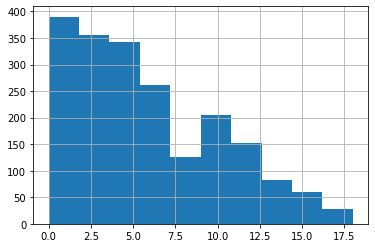

In [6]:
mobile_df['sc_w'].hist()

In [7]:
cnt2 = (mobile_df['px_height']==0).sum()
cnt2

2

<AxesSubplot:>

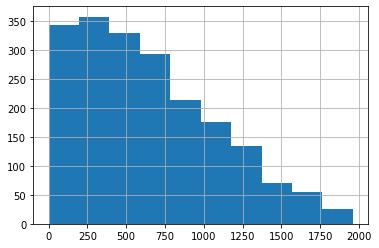

In [8]:
mobile_df['px_height'].hist()

In [9]:
mobile_df = mobile_df[(mobile_df.px_height != 0) & (mobile_df.sc_w != 0)].reset_index()

In [10]:
mobile_df

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1995,794,1,0.5,1,0,1,2,0.8,106,...,1222,1890,668,13,4,19,1,1,0,0
1815,1996,1965,1,2.6,1,0,0,39,0.2,187,...,915,1965,2032,11,10,16,1,1,1,2
1816,1997,1911,0,0.9,1,1,1,36,0.7,108,...,868,1632,3057,9,1,5,1,1,0,3
1817,1998,1512,0,0.9,0,4,1,46,0.1,145,...,336,670,869,18,10,19,1,1,1,0


In [11]:
mobile_df.info(verbose = True, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1819 non-null   int64  
 1   battery_power  1819 non-null   int64  
 2   blue           1819 non-null   int64  
 3   clock_speed    1819 non-null   float64
 4   dual_sim       1819 non-null   int64  
 5   fc             1819 non-null   int64  
 6   four_g         1819 non-null   int64  
 7   int_memory     1819 non-null   int64  
 8   m_dep          1819 non-null   float64
 9   mobile_wt      1819 non-null   int64  
 10  n_cores        1819 non-null   int64  
 11  pc             1819 non-null   int64  
 12  px_height      1819 non-null   int64  
 13  px_width       1819 non-null   int64  
 14  ram            1819 non-null   int64  
 15  sc_h           1819 non-null   int64  
 16  sc_w           1819 non-null   int64  
 17  talk_time      1819 non-null   int64  
 18  three_g 

In [12]:
mobile_df.drop(columns = ['index'], inplace = True)

In [13]:
mobile_df.nunique()
#blue,dual_sim,four_g,three_g,touch_screen, wifi and price_range are all categorical
#they are all binary variables, no need to one-hot encoding

battery_power    1052
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1070
px_width         1056
ram              1455
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [14]:
#get target value
y = mobile_df['price_range']

### Part1.2: Understand the features

In [15]:
#check missing values
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
#no duplicated data
mobile_df.duplicated().sum()

0

In [17]:
#Understand Numerical feature
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,...,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,1238.031336,0.503573,1.519406,0.504673,4.319956,0.524464,32.156130,0.499835,140.578340,4.531061,...,647.086861,1252.828477,2133.468939,12.488730,6.338098,11.009346,0.760858,0.507422,0.513469,1.509621
std,439.989288,0.500125,0.813975,0.500116,4.355982,0.499538,18.105723,0.288875,35.437231,2.288705,...,444.741154,432.418889,1087.488721,4.166008,4.153085,5.456642,0.426677,0.500082,0.499956,1.119529
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,877.000000,1203.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1231.000000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,5.000000,...,562.000000,1251.000000,2175.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.500000,7.000000,...,952.000000,1633.000000,3072.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
#check the feature distribution
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

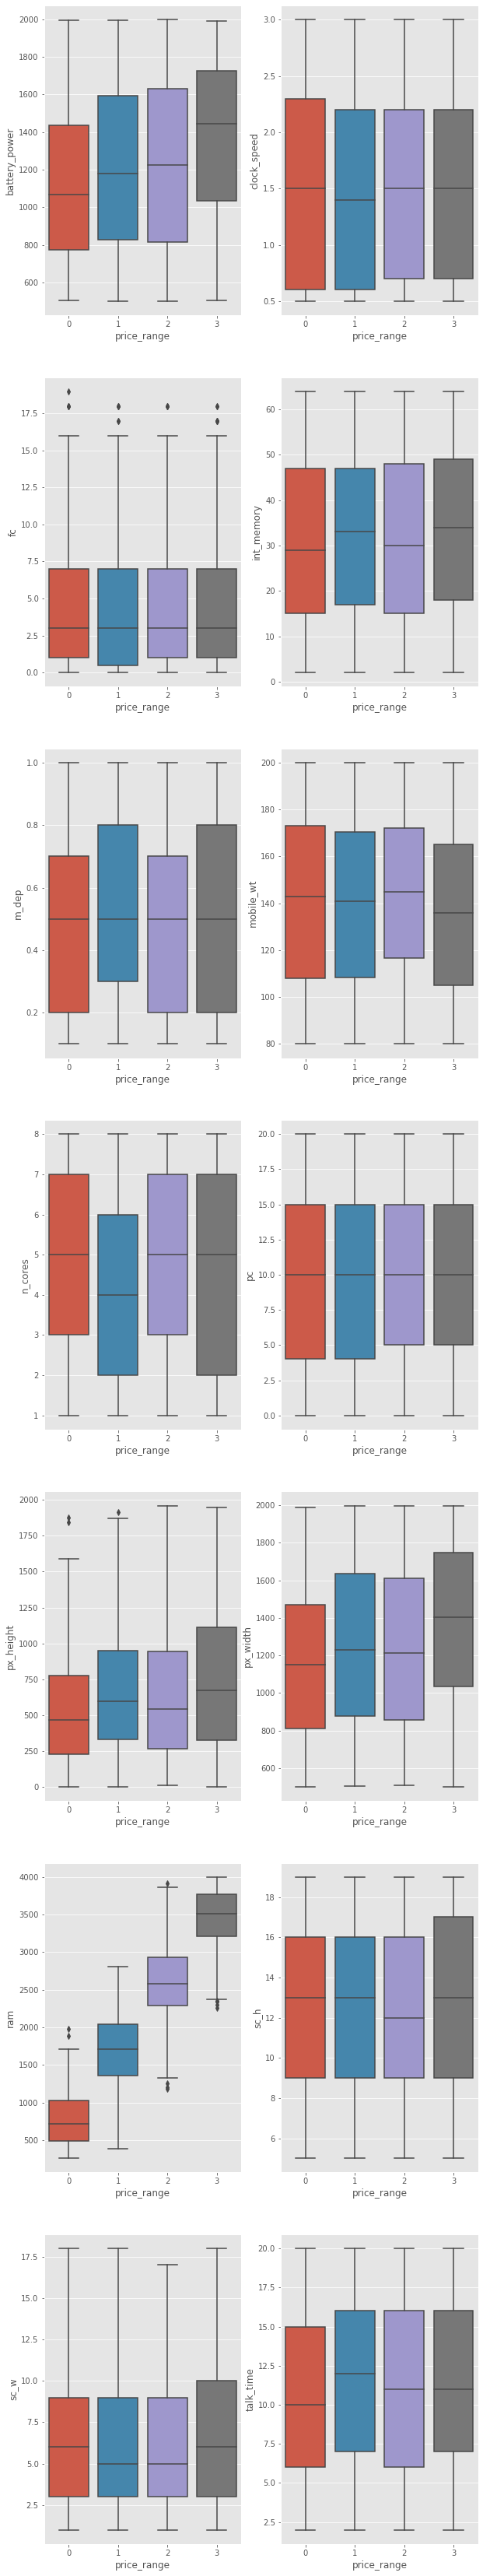

In [20]:
_,axes = plt.subplots(7,2,figsize = [10,60])
sns.boxplot(x = 'price_range', y = 'battery_power', data = mobile_df , ax= axes[0][0])#higher the better
sns.boxplot(x = 'price_range', y = 'clock_speed', data = mobile_df , ax= axes[0][1]) #doesn't seem to be correleated
sns.boxplot(x = 'price_range', y = 'fc',data = mobile_df , ax= axes[1][0]) #have outliers, doesn't seem to be correlated 
sns.boxplot(x = 'price_range', y = 'int_memory',data = mobile_df , ax= axes[1][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'm_dep',data = mobile_df , ax= axes[2][0]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'mobile_wt',data = mobile_df , ax= axes[2][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'n_cores',data = mobile_df , ax= axes[3][0]) # doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'pc',data = mobile_df , ax= axes[3][1]) #seem to be positivey correlated
sns.boxplot(x = 'price_range', y = 'px_height',data = mobile_df , ax= axes[4][0]) # seen to be positively correlated
sns.boxplot(x = 'price_range', y = 'px_width',data = mobile_df , ax= axes[4][1]) #seem to be positively correlated
sns.boxplot(x = 'price_range', y = 'ram',data = mobile_df , ax= axes[5][0])  #higher the beter, exists outlier
sns.boxplot(x = 'price_range', y = 'sc_h',data = mobile_df , ax= axes[5][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'sc_w',data = mobile_df , ax= axes[6][0]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'talk_time',data = mobile_df , ax= axes[6][1]) #doesn't seem to be correlated
 




<AxesSubplot:>

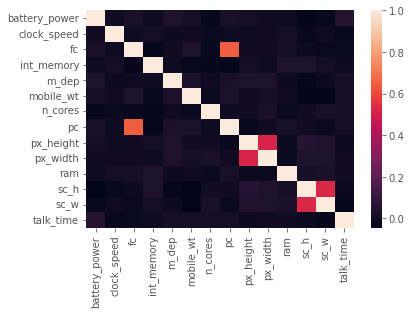

In [21]:
corr_score = mobile_df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].corr()
sns.heatmap(corr_score)
#sc and fc, height and weight, which is expectable

In [22]:
corr_score = mobile_df[['fc','pc','px_height','px_width','sc_h','sc_w']].corr()
corr_score


,fc,pc,px_height,px_width,sc_h,sc_w
fc,1.000000,0.645880,-0.001558,-0.004116,-0.012501,-0.017689
pc,0.645880,1.000000,-0.021050,-0.004242,0.000101,-0.019056
px_height,-0.001558,-0.021050,1.000000,0.514228,0.060553,0.043699
px_width,-0.004116,-0.004242,0.514228,1.000000,0.033194,0.035759
sc_h,-0.012501,0.000101,0.060553,0.033194,1.000000,0.524451
sc_w,-0.017689,-0.019056,0.043699,0.035759,0.524451,1.000000


<AxesSubplot:xlabel='price_range', ylabel='count'>

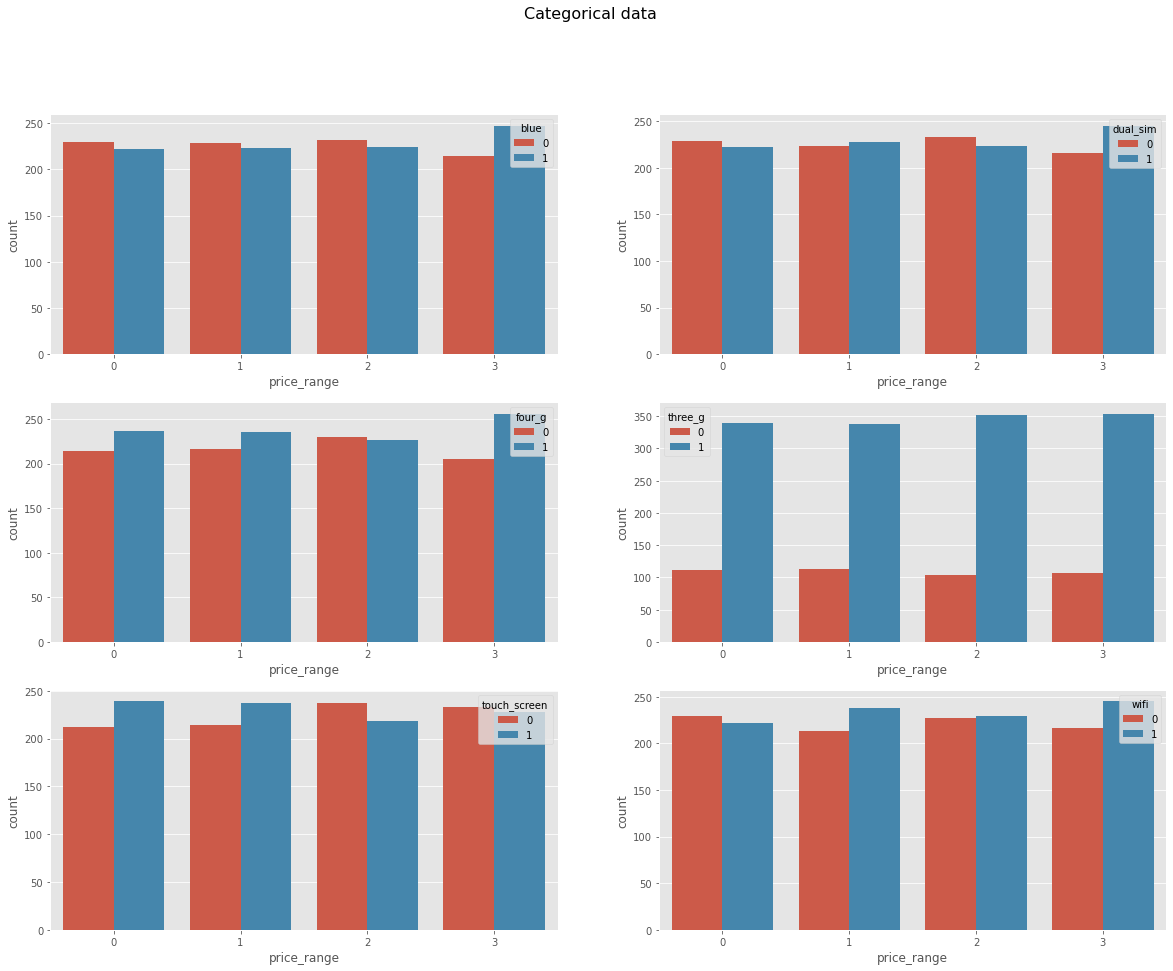

In [23]:
#now understand cateforical feature
#blue,dual_sim,four_g,three_g,touch_screen, wifi and price_range are all categorical
fig,axes = plt.subplots(3,2,figsize = [20,15])
fig.suptitle('Categorical data', fontsize=16)
sns.countplot(x = 'price_range', hue = 'blue', data = mobile_df, ax = axes[0][0])
sns.countplot(x = 'price_range', hue = 'dual_sim', data = mobile_df, ax = axes[0][1])
sns.countplot(x = 'price_range', hue = 'four_g', data = mobile_df, ax = axes[1][0])
sns.countplot(x = 'price_range', hue = 'three_g', data = mobile_df, ax = axes[1][1])
sns.countplot(x = 'price_range', hue = 'touch_screen', data = mobile_df, ax = axes[2][0])
sns.countplot(x = 'price_range', hue = 'wifi', data = mobile_df, ax = axes[2][1])
#bluttooth, dual_sim,four_g  and wifi seems to all favour the mobile pirce to some extent

D:\Anon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, F

<AxesSubplot:xlabel='ram', ylabel='Density'>

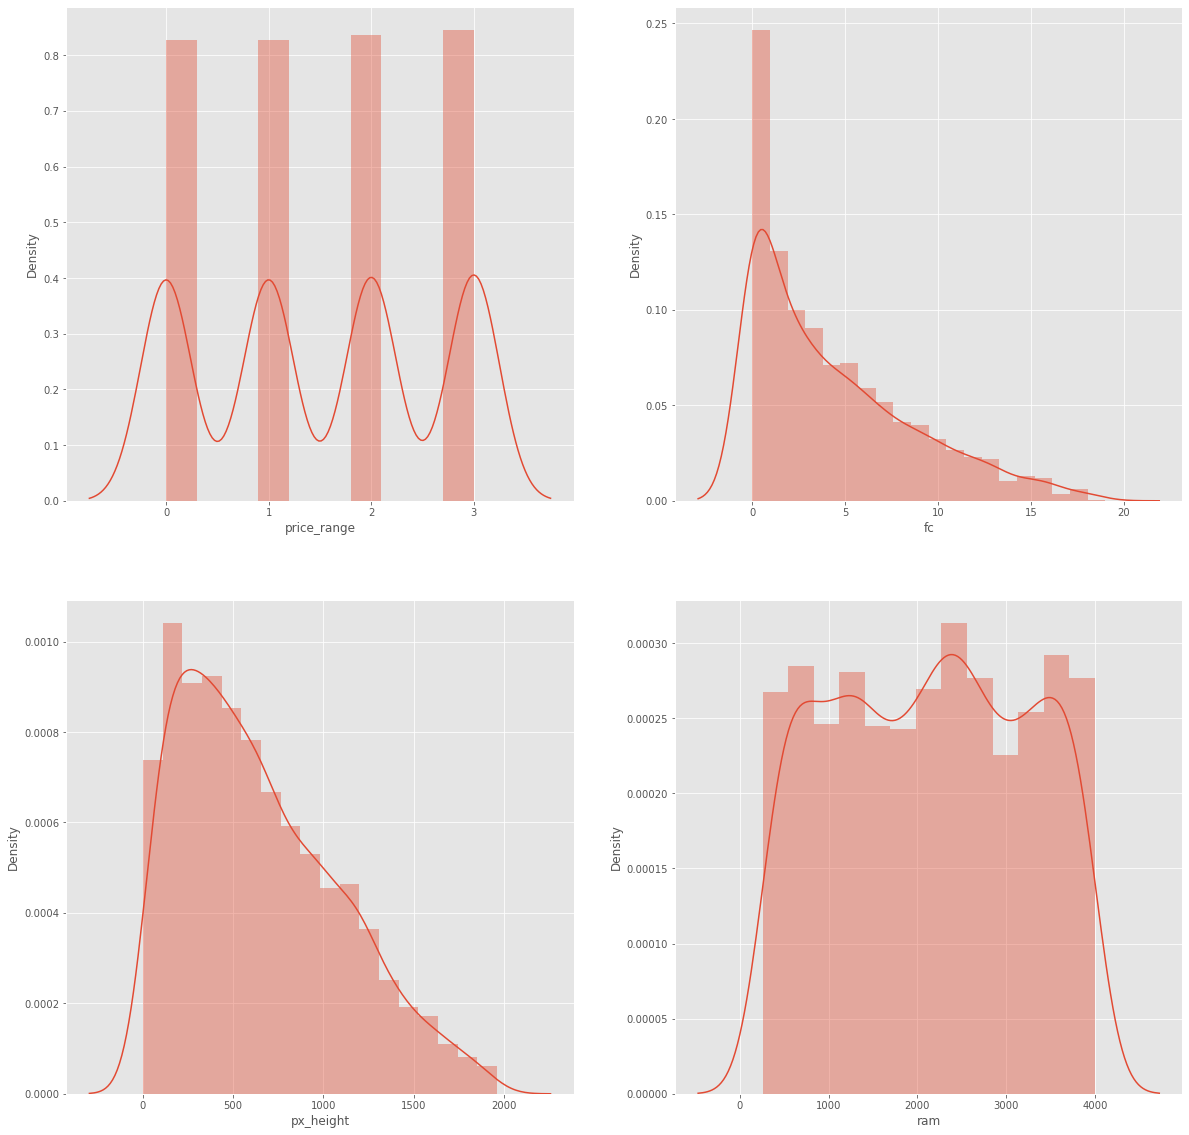

In [24]:
#Check distribution and outlier if we witness outlier point in the previous box plots.
_,axes = plt.subplots(2,2,figsize = [20,20])
sns.distplot(mobile_df.price_range, ax= axes[0][0])#higher the better
sns.distplot(mobile_df.fc, ax= axes[0][1]) #doesn't seem to be correleated
sns.distplot(mobile_df.px_height, ax= axes[1][0]) #have outliers, doesn't seem to be correlated 
sns.distplot(mobile_df.ram, ax= axes[1][1]) #doesn't seem to be correlated

#From the graph we don't think there is a need to handel outlier

## Part 2: Feature Preprocessing

### Part 2.1: Combine Features

In [25]:
#feature combine

#mobile_df['sc_size'] = np.sqrt(mobile_df['sc_h']**2 + mobile_df['sc_w']**2) # 屏幕尺寸
#mobile_df['pixel_size'] = mobile_df['px_height']* mobile_df['px_width'] # 像素尺寸
#to_drop = ['sc_h','sc_w','price_range','px_height','px_width']
to_drop = ['price_range']
X = mobile_df.drop(to_drop, axis = 1)

<AxesSubplot:>

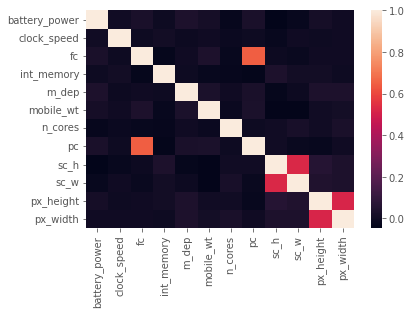

In [26]:
corr_score = X[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','sc_h','sc_w','px_height','px_width']].corr()
sns.heatmap(corr_score)

In [27]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [28]:
X.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1814,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1815,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1816,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1817,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1
1818,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1


In [29]:
X.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

### Part 2.2 : Split DataSet

In [30]:
cat_cols = X.columns[X.nunique() == 2]
num_cols = X.columns[X.nunique() != 2]

In [31]:
print(num_cols)

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')


In [32]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.25, stratify = y, random_state = 1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 1364 observation with 20 features
test data has 455 observation with 20 features


### Part 2.3: Standardize/Normalize Data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_s = X.copy()
X_s[num_cols] = scaler.transform(X_s[num_cols])

D:\Anon\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anon\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [34]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
985,0.226379,0,-0.485759,0,1.586185,0,0.273074,0.680813,-0.415613,1.078425,1.705561,1.042764,0.900587,0.019370,-0.600773,-1.296409,-1.285808,1,0,0
408,0.133361,0,-0.733035,0,1.352008,1,-0.386559,1.716074,1.057139,0.639198,0.368942,0.277348,-0.800809,-1.008261,-1.560602,-1.054607,0.004324,1,1,0
589,-0.268208,1,-1.227586,1,-0.755579,0,1.152585,0.335726,-0.557224,-0.239256,1.037252,-0.925124,-1.169675,1.381919,-1.320645,-0.812804,1.663065,1,1,0
1041,1.571748,0,-0.238483,0,-0.287227,0,-0.441529,1.716074,-1.548499,-0.239256,-0.967677,0.524184,0.040668,0.305789,-0.840730,-1.054607,0.741542,1,1,0
1281,1.685185,1,-1.227586,1,-0.287227,0,-0.606437,1.025900,-1.293600,1.517652,-0.466445,-1.167430,-1.704532,-0.385094,-0.120858,0.879814,-0.548590,0,0,1


## Part 3: Model Traing and Result Evaluation

### Part3.1:Model Exploration

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#Logistic Regression
classifier_logistic = LogisticRegression()

#K Nearest Neighbots
classifier_KNN = KNeighborsClassifier()

#Random Forest
classifier_RF = RandomForestClassifier()


In [36]:
#Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression', 'KNN' , 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv = 5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1


[0.93772894 0.94139194 0.93040293 0.96336996 0.96323529]
Model accuracy of Logistic Regression is 0.947225813402284
[0.54945055 0.53113553 0.56043956 0.58974359 0.55147059]
Model accuracy of KNN is 0.556447963800905
[0.83882784 0.84981685 0.87179487 0.86446886 0.86397059]
Model accuracy of Random Forest is 0.8577758026287438


In [37]:
# We see that it seems like logistic regression works best

In [38]:
def draw_mae_v1(model_name,X,y):
    mae_train = []
    mae_test = []
    kf = KFold(n_splits=8)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = model_name
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))
    plt.plot(mae_train, 'o-', color='green', label='train')
    plt.plot(mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(f"{model_name}")
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()
    
def draw_mae_v2(model_name,X,y):
    mae_train = []
    mae_test = []
    kf = KFold(n_splits=8)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = model_name
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))
    plt.plot(mae_train, 'o-', color='green', label='train')
    plt.plot(mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(f"{model_name}")
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

D:\Anon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Ano

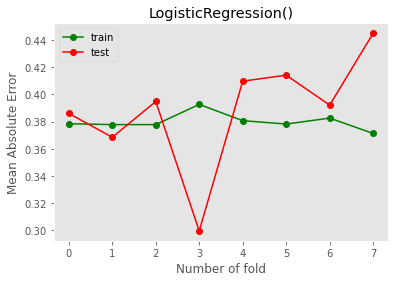

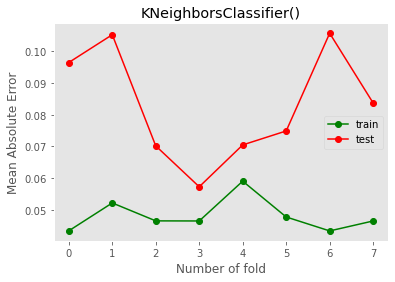

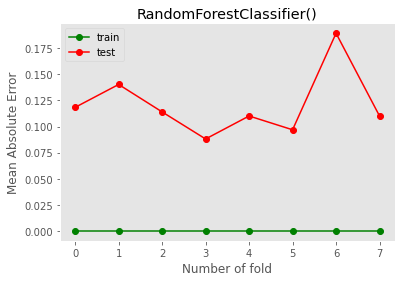

In [39]:
j = 0
for i in model_list: 
    draw_mae(i,X,y)

In [40]:
# We see thatthere is overfitting

In [41]:
#let's analyze feature importance and drop or combine highly correlated features and unimportant features

In [42]:
def test_model(model, X, y):
    mae_train = []
    mae_test = []
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))

    plt.plot(mae_train, 'o-', color='green', label='train')
    plt.plot(mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

### Part 3.2: Feature Preprocessing based on feature importance and overfitting analysis

#### Part 3.2.1: Feature importanc based on L1

In [43]:
#L1
# For L1, remove feature with 0 coff


X_2 = X.copy()
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_2)
for k in range(4):
    print(f'for price_range: {k}')
    for i in range(1,11):
        LRmodel_l1 = LogisticRegression(penalty = 'l1', C = i/10,solver = 'liblinear', random_state = 1)
        LRmodel_l1.fit(X_l1,y)
        indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]
        print("Logistic Regression (L1) Coeffients\n")
        print("C is {}".format(i/10))
        for ind in range(X_2.shape[1]):
            print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[k][indicies[ind]], 4)))

#LRmodel_l1 = LogisticRegression(penalty = 'l1', C = 1,solver = 'liblinear', random_state = 1)
#LRmodel_l1.fit(X_l1,y)

#indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

#print("Logistic Regression (L1) Coeffients")
#for ind in range(X_2.shape[1]):
    #print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[0][indicies[ind]], 4)))

for price_range: 0
Logistic Regression (L1) Coeffients

C is 0.1
ram : -5.7344
battery_power : -1.2833
px_height : -0.8581
px_width : -0.6748
mobile_wt : 0.023
int_memory : -0.0144
m_dep : 0.0
blue : 0.0
clock_speed : 0.0
dual_sim : 0.0
fc : 0.0
four_g : 0.0
wifi : 0.0
touch_screen : 0.0
pc : 0.0
sc_h : 0.0
sc_w : 0.0
talk_time : 0.0
three_g : 0.0
n_cores : 0.0
Logistic Regression (L1) Coeffients

C is 0.2
ram : -7.8982
battery_power : -1.8422
px_height : -1.1979
px_width : -1.0016
mobile_wt : 0.1371
int_memory : -0.0793
m_dep : -0.027
dual_sim : 0.0243
clock_speed : 0.0199
sc_w : 0.0119
blue : 0.0
fc : 0.0
four_g : 0.0
wifi : 0.0
touch_screen : 0.0
pc : 0.0
sc_h : 0.0
talk_time : 0.0
three_g : 0.0
n_cores : 0.0
Logistic Regression (L1) Coeffients

C is 0.3
ram : -9.5044
battery_power : -2.2454
px_height : -1.4518
px_width : -1.2357
mobile_wt : 0.2147
int_memory : -0.113
m_dep : -0.0514
dual_sim : 0.0401
sc_w : 0.0381
clock_speed : 0.0332
three_g : 0.0256
wifi : 0.0015
touch_screen : 0

Logistic Regression (L1) Coeffients

C is 0.7
ram : 0.5992
battery_power : -0.0186
px_height : 0.0155
px_width : -0.0811
mobile_wt : 0.1378
int_memory : -0.0769
three_g : 0.0999
wifi : -0.0372
sc_w : 0.0066
m_dep : -0.0414
dual_sim : -0.0693
blue : -0.0427
talk_time : -0.0162
touch_screen : -0.0557
clock_speed : 0.0137
pc : -0.0145
sc_h : -0.0881
four_g : -0.1375
fc : 0.0391
n_cores : 0.1016
Logistic Regression (L1) Coeffients

C is 0.8
ram : 0.6002
battery_power : -0.0191
px_height : 0.0168
px_width : -0.0823
mobile_wt : 0.1385
int_memory : -0.0775
three_g : 0.1011
wifi : -0.0379
sc_w : 0.0077
m_dep : -0.042
talk_time : -0.0167
dual_sim : -0.0699
blue : -0.0433
touch_screen : -0.0563
clock_speed : 0.0143
pc : -0.0161
sc_h : -0.0894
four_g : -0.1387
fc : 0.0406
n_cores : 0.1023
Logistic Regression (L1) Coeffients

C is 0.9
ram : 0.601
battery_power : -0.0196
px_height : 0.0178
px_width : -0.0833
mobile_wt : 0.139
int_memory : -0.0779
three_g : 0.1021
wifi : -0.0384
sc_w : 0.0085
talk_t

Logistic Regression (L1) Coeffients


for price_range: 0


ram : -9.5044
battery_power : -2.2454
px_height : -1.4518
px_width : -1.2357
mobile_wt : 0.2147
int_memory : -0.113
m_dep : -0.0514
dual_sim : 0.0401
sc_w : 0.0381
clock_speed : 0.0332
three_g : 0.0256
wifi : 0.0015
touch_screen : 0.0
pc : 0.0
four_g : 0.0
fc : 0.0
sc_h : 0.0
talk_time : 0.0
blue : 0.0
n_cores : 0.0


for price_range: 1


ram : -0.5631
n_cores : -0.1269
talk_time : 0.0933
m_dep : 0.0837
battery_power : -0.0634
px_height : 0.0597
clock_speed : -0.0576
sc_w : -0.0443
wifi : 0.0406
int_memory : 0.0329
touch_screen : 0.0229
dual_sim : 0.0205
px_width : -0.0165
three_g : -0.0097
sc_h : 0.0
pc : 0.0
mobile_wt : 0.0
four_g : 0.0
fc : 0.0
blue : 0.0


for price_range: 2


ram : 0.5886
mobile_wt : 0.1312
four_g : -0.1243
n_cores : 0.0945
three_g : 0.0866
sc_h : -0.078
int_memory : -0.0707
px_width : -0.0683
dual_sim : -0.0629
touch_screen : -0.0492
blue : -0.0364
m_dep : -0.0352
wifi : -0.0305
fc : 0.0245
battery_power 

D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass 

<AxesSubplot:>

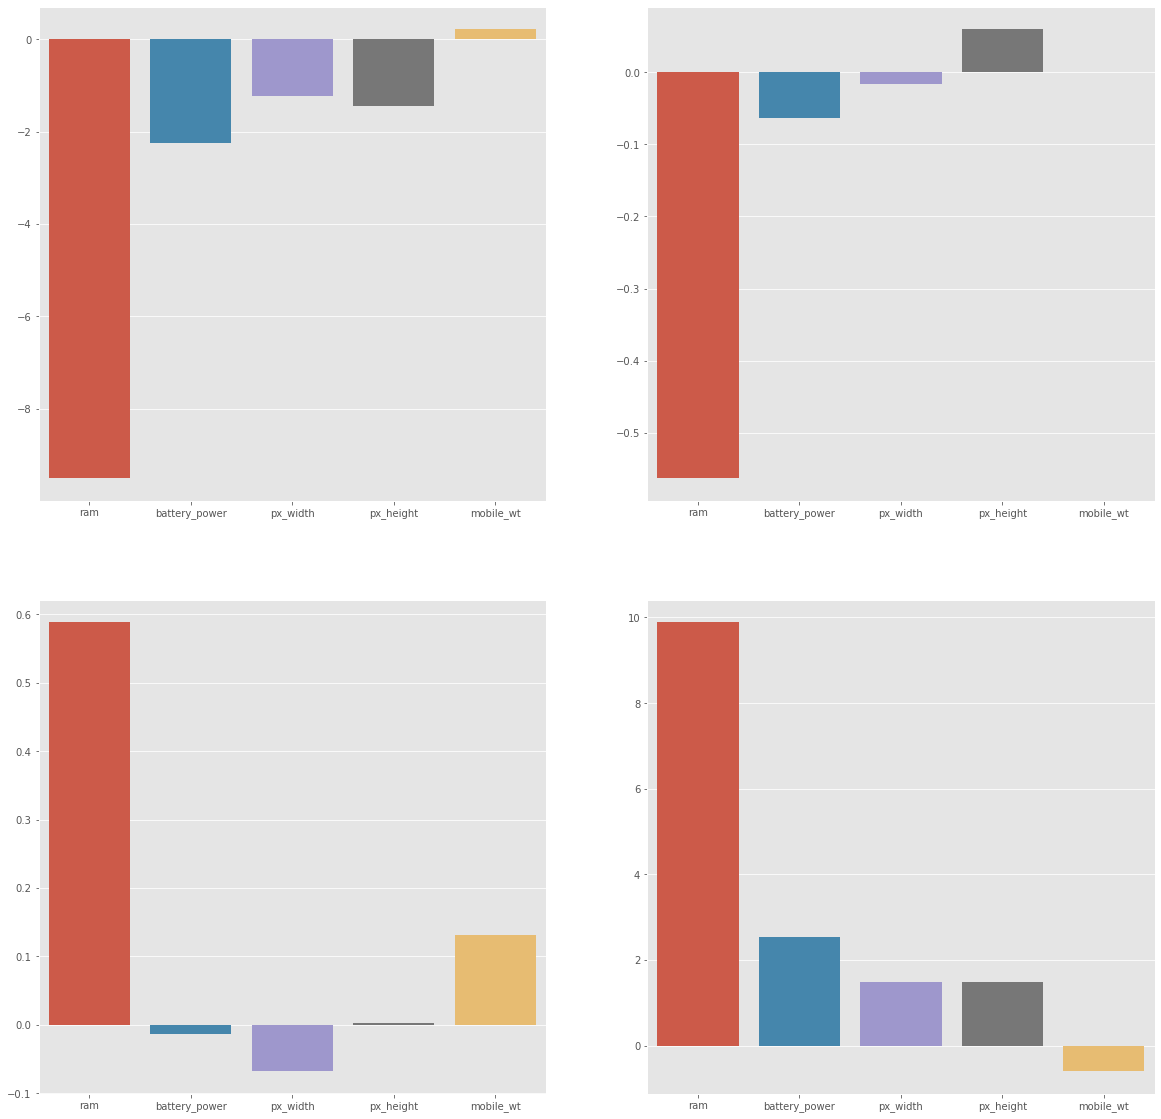

In [44]:
LRmodel_l1 = LogisticRegression(penalty = 'l1', C = 0.3,solver = 'liblinear', random_state = 1)
LRmodel_l1.fit(X_l1,y)

#indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print("Logistic Regression (L1) Coeffients")
for k in range(4):
    print('\n')
    print(f"for price_range: {k}")
    print('\n')
    indicies = np.argsort(abs(LRmodel_l1.coef_[k]))[::-1]
    for ind in range(X_2.shape[1]):
        print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[k][indicies[ind]], 4)))

#fig,ax = plt.subplots(4,1)
#for k in range(4):
#    plt.bar(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[k][indicies[range(5)]],axe = ax[])
    
_,axes = plt.subplots(2,2,figsize = [20,20])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[0][indicies[range(5)]], ax= axes[0][0])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[1][indicies[range(5)]], ax= axes[0][1]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[2][indicies[range(5)]], ax= axes[1][0]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[3][indicies[range(5)]], ax= axes[1][1]) 


#### Part 3.2.2: Feature importanc based on L2

In [45]:
#L2
X_2 = X.copy()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_2)
LRmodel_l2 = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'liblinear', random_state = 1)
LRmodel_l2.fit(X_l1,y)

indicies = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print("Logistic Regression (L2) Coeffients")
for ind in range(X_2.shape[1]):
    print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l2.coef_[0][indicies[ind]], 4)))

Logistic Regression (L2) Coeffients
ram : -3.4755
battery_power : -0.8228
px_height : -0.5854
px_width : -0.4554
int_memory : -0.093
clock_speed : 0.084
n_cores : 0.0824
mobile_wt : 0.0801
m_dep : -0.0742
sc_w : 0.0688
talk_time : -0.06
dual_sim : 0.0461
touch_screen : 0.0385
fc : -0.038
four_g : -0.0305
sc_h : -0.0262
three_g : 0.0256
pc : 0.0255
blue : 0.0135
wifi : -0.0116


D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass 

<AxesSubplot:>

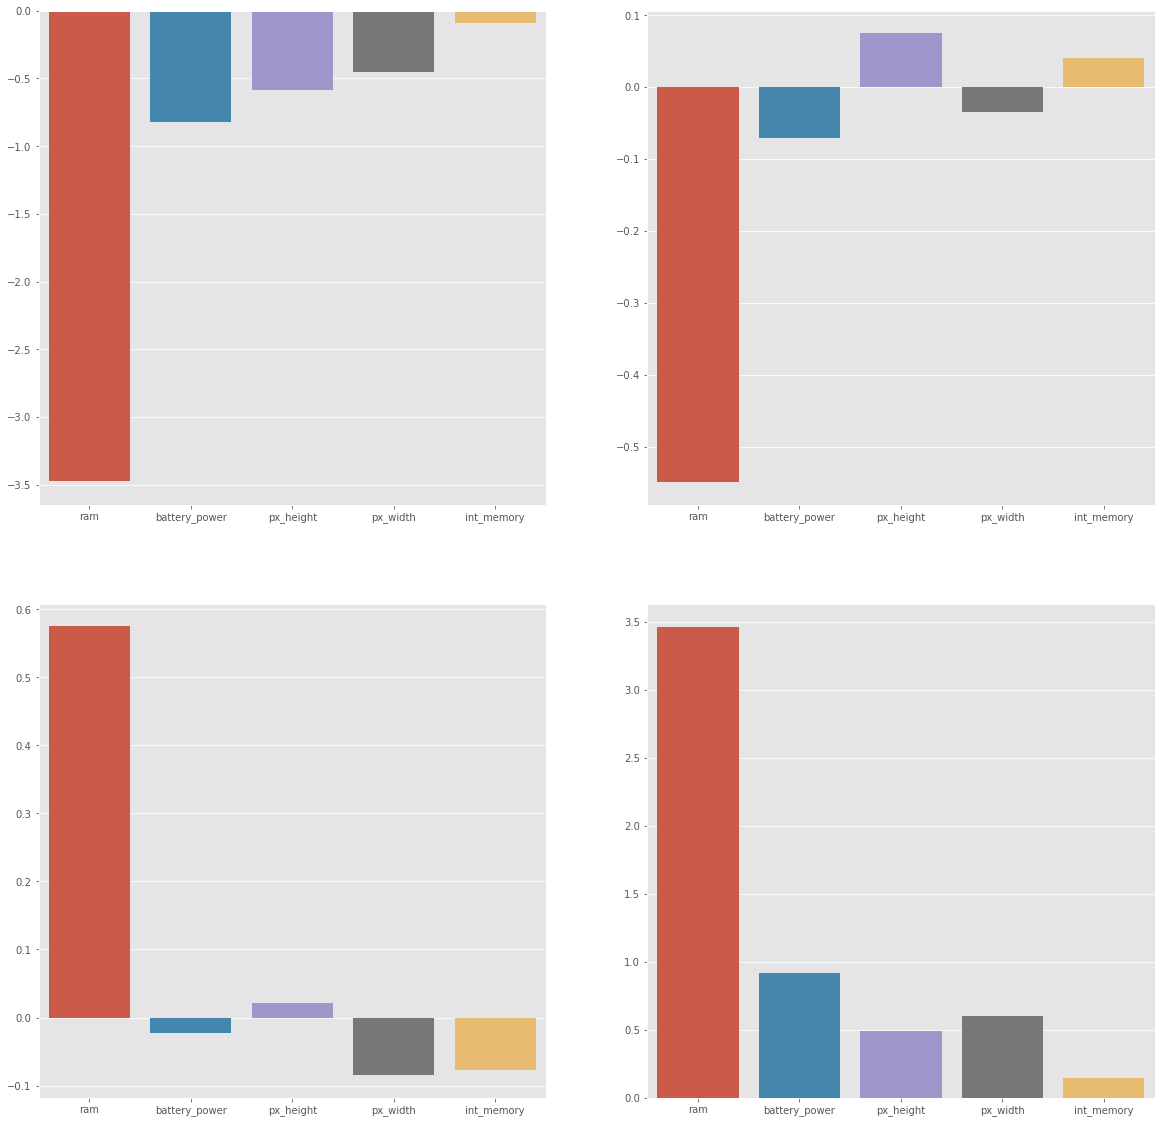

In [46]:
_,axes = plt.subplots(2,2,figsize = [20,20])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[0][indicies[range(5)]], ax= axes[0][0])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[1][indicies[range(5)]], ax= axes[0][1]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[2][indicies[range(5)]], ax= axes[1][0]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[3][indicies[range(5)]], ax= axes[1][1]) 

#### Part 3.2.3: Feature importanc based on Random Forest

Feature importance ranking by Random Forest Model: 
ram : 0.4811
battery_power : 0.0743
px_height : 0.0593
px_width : 0.0554
mobile_wt : 0.04
int_memory : 0.0367
pc : 0.03
talk_time : 0.0294
sc_w : 0.0287
clock_speed : 0.0282
sc_h : 0.0273
fc : 0.025
m_dep : 0.0245
n_cores : 0.0227
touch_screen : 0.0072
four_g : 0.0064
dual_sim : 0.0061
three_g : 0.006
wifi : 0.0059
blue : 0.0058


D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

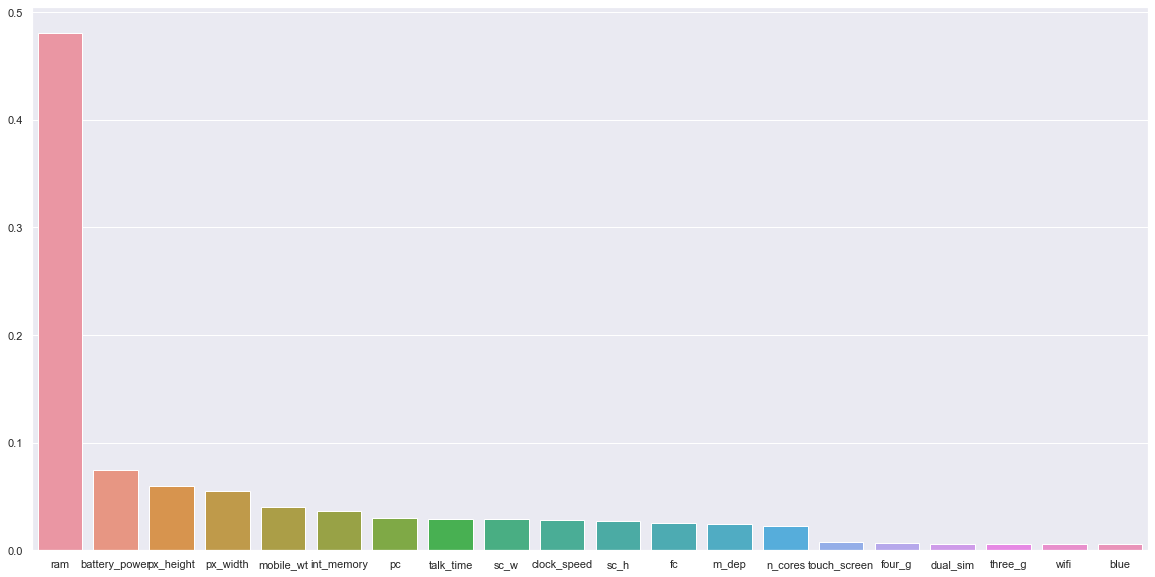

In [47]:
X_RF = X.copy()
forest = RandomForestClassifier()
forest.fit(X_RF,y)

importances = forest.feature_importances_

indicies = np.argsort(importances)[::-1]

print("Feature importance ranking by Random Forest Model: ")
for ind in range(X.shape[1]):
    print("{0} : {1}".format(X_RF.columns[indicies[ind]], round(importances[indicies[ind]],4)))
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(X_RF.columns[indicies[range(X.shape[1])]], importances[indicies[range(X.shape[1])]])

<Figure size 1600x1600 with 0 Axes>

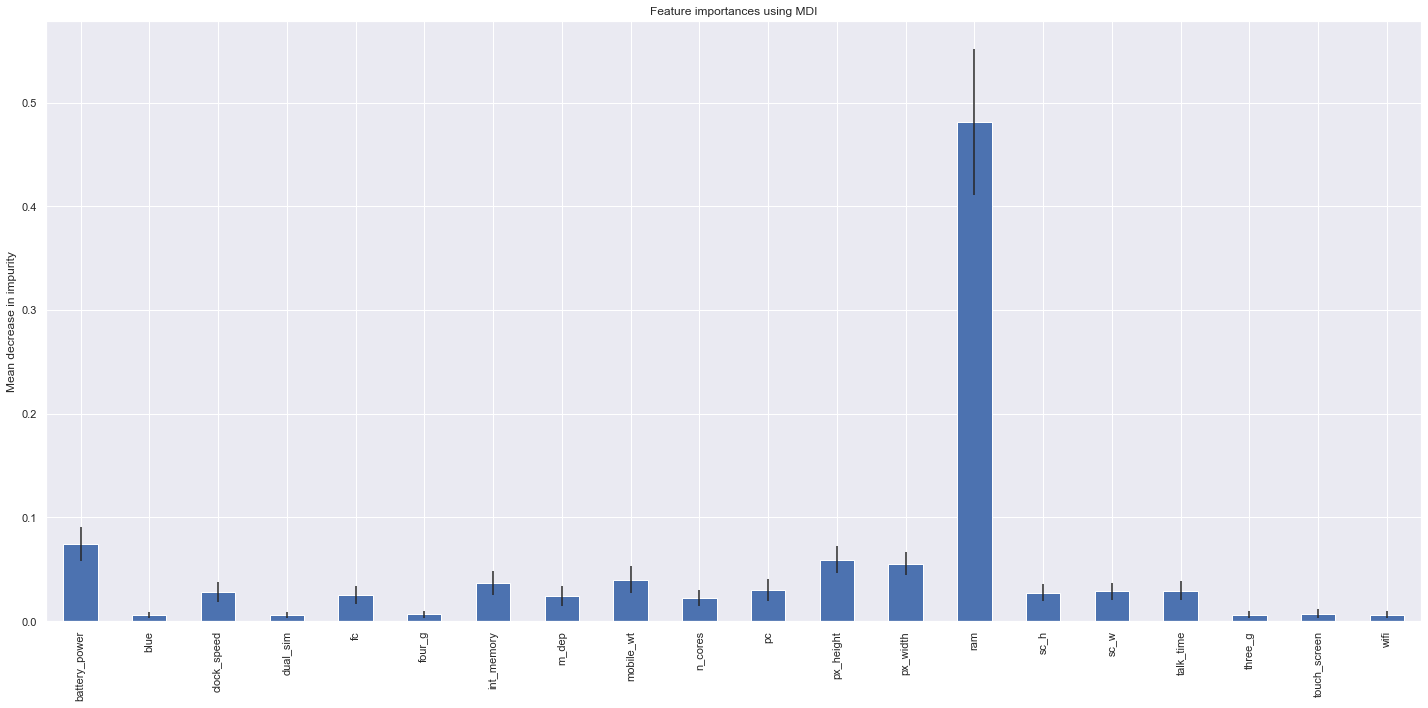

In [48]:
from matplotlib.pyplot import figure

figure(figsize=(20, 20), dpi=80)
importances = forest.feature_importances_

forest_importances = pd.Series(importances,index=X_RF.columns)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [49]:
dict(forest_importances)

{'battery_power': 0.07428103602376566,
 'blue': 0.005842707375694708,
 'clock_speed': 0.02821425476731532,
 'dual_sim': 0.006066104972060258,
 'fc': 0.025049870622329717,
 'four_g': 0.0064084563447834465,
 'int_memory': 0.036661107524720134,
 'm_dep': 0.024471327255997117,
 'mobile_wt': 0.04004168521978573,
 'n_cores': 0.022663130711065974,
 'pc': 0.029957082576903802,
 'px_height': 0.05929530153778747,
 'px_width': 0.0554377982049549,
 'ram': 0.48108520487942164,
 'sc_h': 0.027288354438348872,
 'sc_w': 0.02868069868580381,
 'talk_time': 0.029387893247101626,
 'three_g': 0.0059932421752493985,
 'touch_screen': 0.0072354124209544225,
 'wifi': 0.005939331015955912}

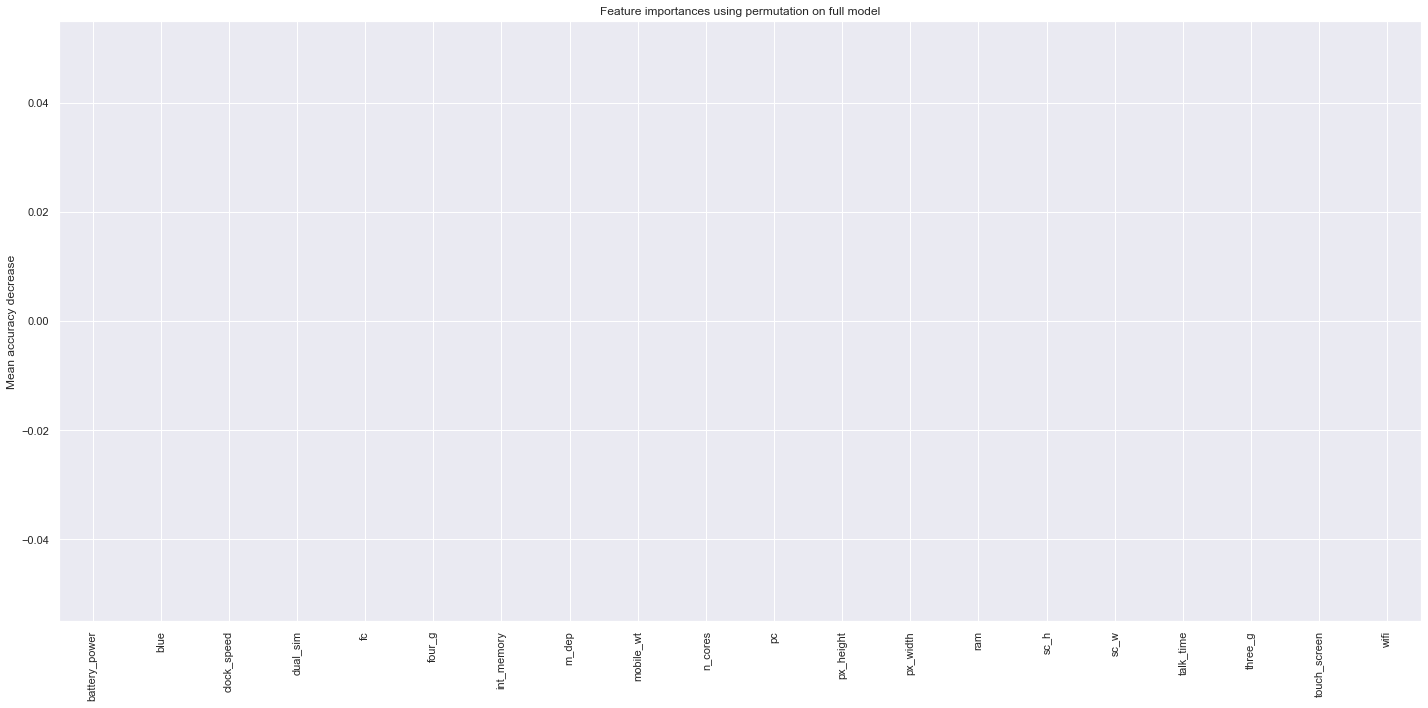

In [50]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    forest, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
forest_importances2 = pd.Series(result.importances_mean, index=X_RF.columns)
fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [51]:
forest_importances2

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64

In [52]:
# importance

<AxesSubplot:>

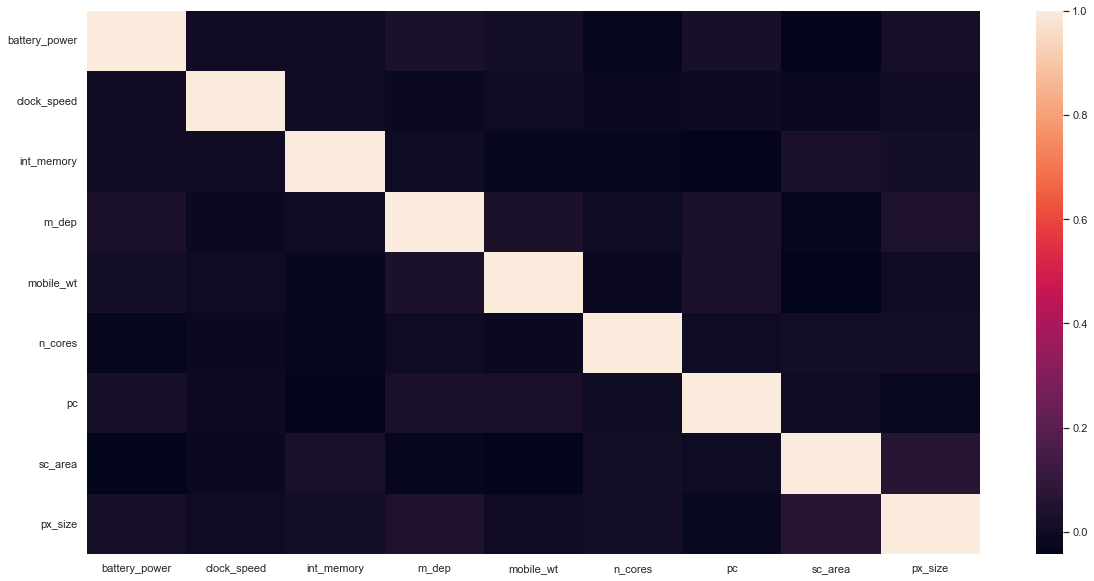

In [53]:
# We decide to drop sc_h and sc_w, wifi, three_g, four_g
# combine sc_h, sc_w and px_height, px_width
#They all all deemed unimportant, unlike dual_sim, battery power etc
mobile_df['sc_area'] = np.sqrt(mobile_df['sc_h'] ** 2 + mobile_df['sc_w'] ** 2)
mobile_df['px_size'] = mobile_df['px_height'] * mobile_df['px_width']
mobile_df.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g'], inplace = True)
corr_score = mobile_df[['battery_power','clock_speed','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','sc_area','px_size']].corr()
sns.heatmap(corr_score)



In [54]:
X_train_original = X_train.copy()
X_test_origianl  = X_test.copy()

X_test['sc_area'] = np.sqrt(X_test['sc_h'] ** 2 + X_test['sc_w'] ** 2)
X_test['px_size'] = X_test['px_height'] * X_test['px_width']
X_test.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g','fc','pc','px_height','px_width'], inplace = True)

X_train['sc_area'] = np.sqrt(X_train['sc_h'] ** 2 + X_train['sc_w'] ** 2)
X_train['px_size'] = X_train['px_height'] * X_train['px_width']
X_train.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g','fc','pc','px_height','px_width'], inplace = True)

X['sc_area'] = np.sqrt(X['sc_h'] ** 2 + X['sc_w'] ** 2)
X['px_size'] = X['px_height'] * X['px_width']
X.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g','fc','pc','px_height','px_width'], inplace = True)

C:\Users\lzabr\AppData\Local\Temp/ipykernel_1404/613459153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sc_area'] = np.sqrt(X_test['sc_h'] ** 2 + X_test['sc_w'] ** 2)
C:\Users\lzabr\AppData\Local\Temp/ipykernel_1404/613459153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['px_size'] = X_test['px_height'] * X_test['px_width']
D:\Anon\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [55]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'touch_screen',
       'sc_area', 'px_size'],
      dtype='object')

### Part 3.3: Grid Search to Find Optimal Hyperparameters

In [56]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
    print("Best score: "+ str(gs.best_score_))
    print('Best parameters sets:')
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ":" + str(best_parameters[param_name]))

#### Part 3.2.1: Logistic Regression

In [57]:
parameters = {
    'penalty':('l1', 'l2'),
    'C':np.linspace(0,1,5)
}
Grid_LR = GridSearchCV(LogisticRegression(solver = 'liblinear'), parameters, cv=5)
Grid_LR.fit(X_train, y_train)

D:\Anon\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anon\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anon\lib\site-packages\sklearn\linear_model\_logistic.py", line 1358, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "D:\Anon\lib\site-packages\sklearn\svm\_base.py", line 975, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anon\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these

D:\Anon\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.75956152 0.73463693 0.75882892 0.74490412
 0.7581017  0.74783991 0.75809901 0.7500404 ]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ('l1', 'l2')})

In [58]:
print_grid_search_metrics(Grid_LR)

Best score: 0.7595615169144582
Best parameters sets:
C:0.25
penalty:l1


In [59]:
#best model
best_LR_model = Grid_LR.best_estimator_

In [60]:
best_LR_model.predict(X_test)

array([2, 1, 3, 3, 1, 2, 2, 1, 3, 3, 2, 0, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 1, 0, 3, 0, 1, 3, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 3, 2,
       1, 3, 3, 1, 0, 3, 1, 3, 0, 2, 2, 3, 0, 2, 2, 3, 2, 2, 3, 0, 3, 1,
       0, 2, 0, 2, 2, 0, 2, 3, 3, 1, 0, 1, 0, 1, 0, 3, 3, 0, 2, 3, 3, 2,
       1, 1, 2, 2, 3, 1, 3, 3, 1, 0, 2, 1, 0, 0, 3, 0, 1, 0, 1, 3, 0, 3,
       3, 0, 3, 1, 2, 0, 0, 3, 0, 3, 2, 2, 3, 1, 2, 3, 1, 0, 3, 3, 3, 0,
       1, 2, 3, 0, 2, 2, 0, 3, 0, 3, 2, 3, 1, 3, 0, 1, 2, 2, 1, 1, 3, 0,
       3, 1, 0, 3, 2, 3, 3, 1, 0, 1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 3, 0, 3, 2, 1, 3, 0, 2, 3,
       0, 0, 3, 1, 2, 2, 3, 0, 0, 1, 3, 2, 0, 3, 3, 0, 3, 0, 3, 0, 3, 1,
       2, 2, 1, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       3, 3, 2, 0, 3, 2, 0, 2, 0, 1, 3, 2, 1, 1, 0, 0, 2, 1, 3, 1, 3, 0,
       1, 1, 3, 0, 1, 3, 3, 2, 3, 3, 0, 1, 0, 0, 3, 2, 2, 3, 1, 0, 1, 3,
       3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1, 2, 0, 1,

In [61]:
best_LR_model.score(X_test,y_test) #not underfitting, not overfitting, no obvious difference

0.7670329670329671

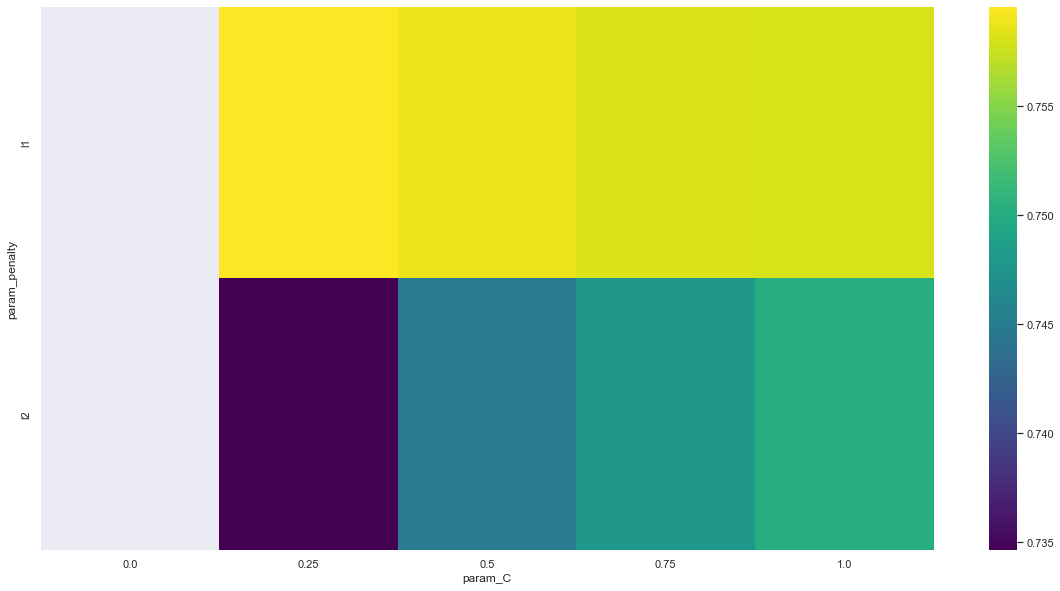

In [62]:
# L1 is better / L2 ; when C = 1.0
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index = 'param_penalty', columns = 'param_C', values ='mean_test_score'))
_=sns.heatmap(res,cmap = 'viridis')

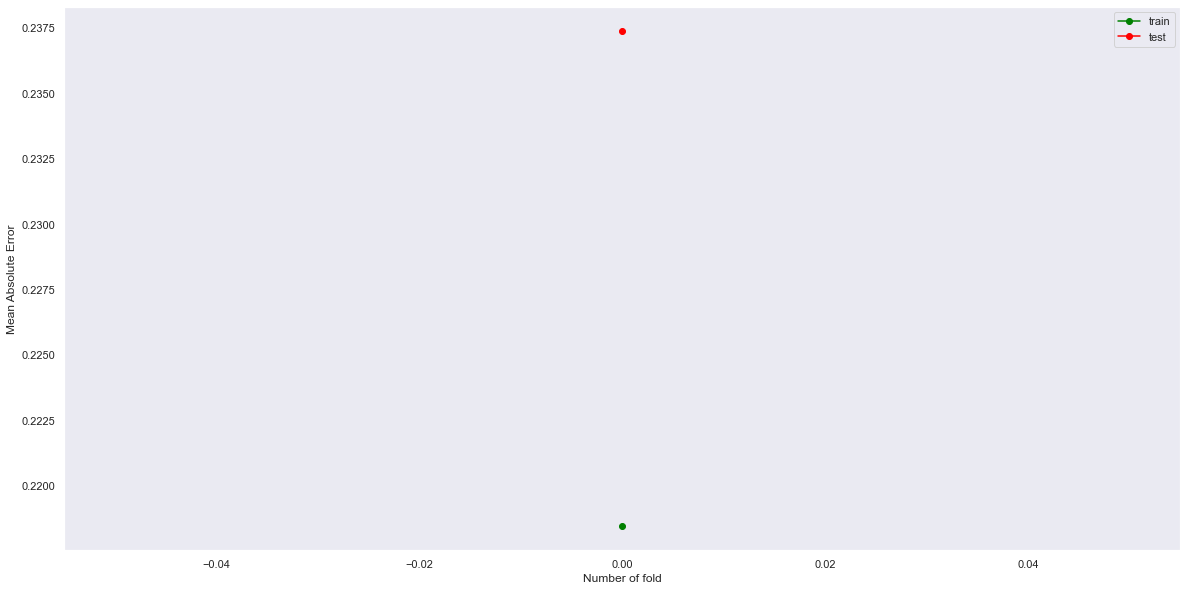

In [63]:
test_model(best_LR_model, X_test, y_test)

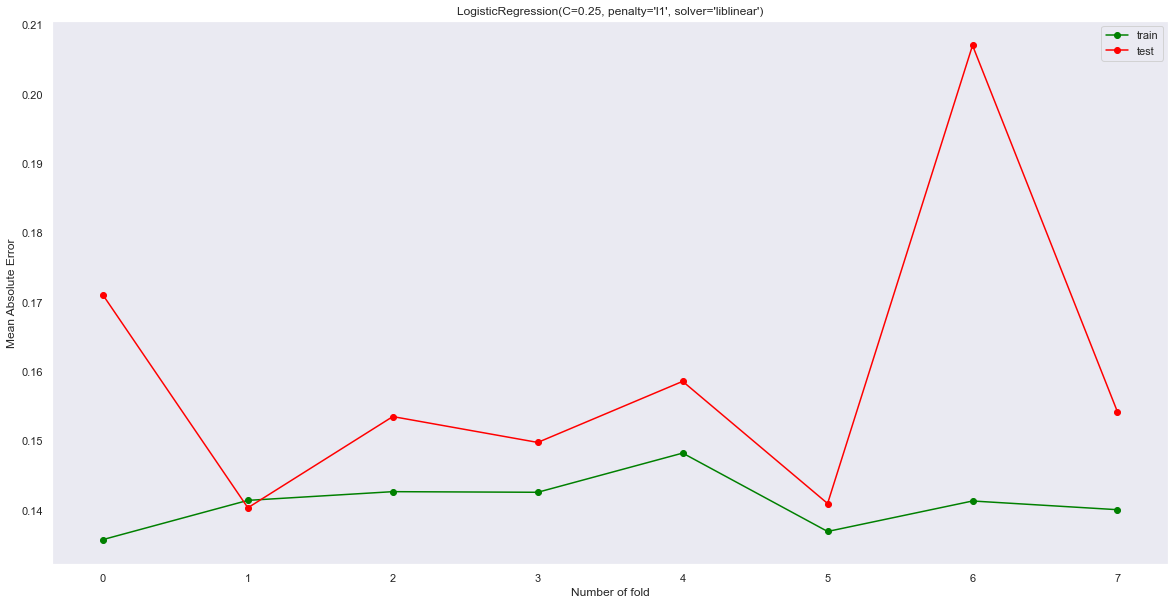

In [64]:
draw_mae(best_LR_model, X_s, y)

#### Part 3.2.2 : KNN

In [65]:
parameters = {'n_neighbors': [i for i in range(1,45,2)]}
Grid_KNN =  GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43]})

In [66]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.6876885369532428
Best parameters sets:
n_neighbors:31


In [67]:
best_KNN_model = Grid_KNN.best_estimator_

In [68]:
best_KNN_model.predict(X_test)

array([1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2, 3, 1, 3, 0, 0, 0, 0,
       0, 3, 1, 1, 0, 3, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2,
       1, 3, 3, 3, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 3, 0, 3, 1,
       0, 2, 0, 1, 2, 0, 1, 3, 3, 1, 0, 0, 0, 2, 0, 3, 3, 1, 3, 3, 2, 2,
       1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 0, 3,
       2, 0, 2, 0, 2, 0, 0, 3, 0, 3, 3, 1, 3, 1, 2, 2, 2, 0, 3, 2, 3, 0,
       1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0,
       3, 2, 0, 3, 2, 3, 3, 1, 0, 2, 0, 1, 3, 0, 0, 2, 3, 0, 1, 0, 2, 1,
       0, 3, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 3, 0, 3, 3,
       1, 1, 3, 1, 2, 1, 3, 0, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 3, 0, 3, 1,
       2, 3, 2, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 2, 2, 0, 3, 2, 0, 2, 0, 1, 3, 1, 0, 1, 0, 0, 2, 1, 3, 0, 3, 1,
       2, 1, 3, 0, 1, 3, 2, 2, 2, 2, 0, 2, 1, 0, 3, 2, 2, 3, 1, 1, 0, 2,
       3, 1, 2, 3, 0, 2, 1, 2, 3, 2, 3, 2, 2, 0, 1,

In [69]:
best_KNN_model.score(X_test,y_test)

0.7032967032967034

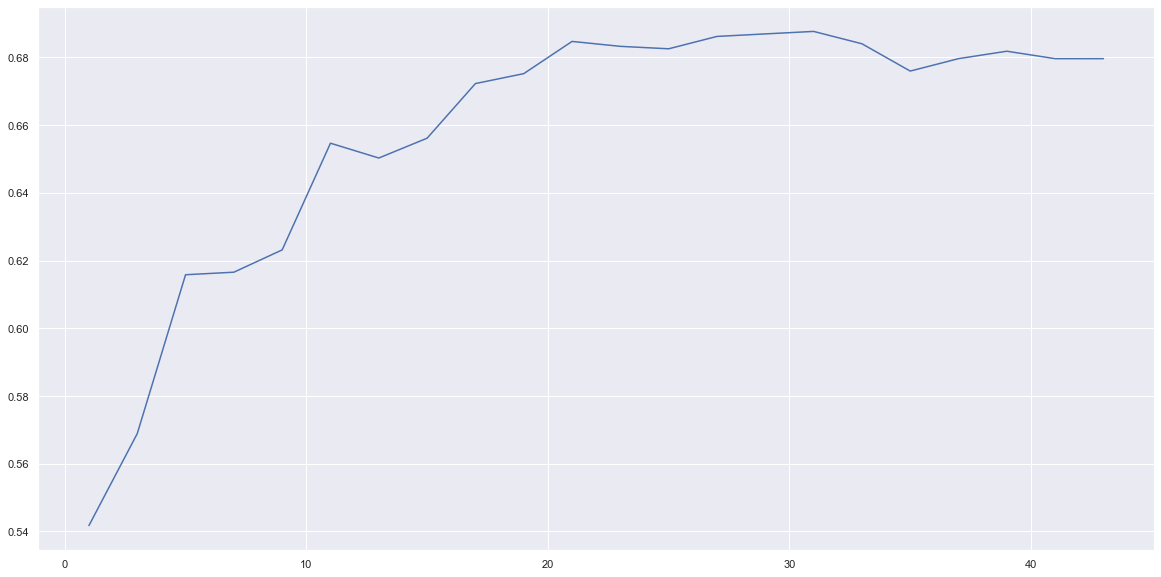

In [70]:
KNN_models = pd.DataFrame(Grid_KNN.cv_results_)
plt.plot(KNN_models['param_n_neighbors'],KNN_models['mean_test_score'])

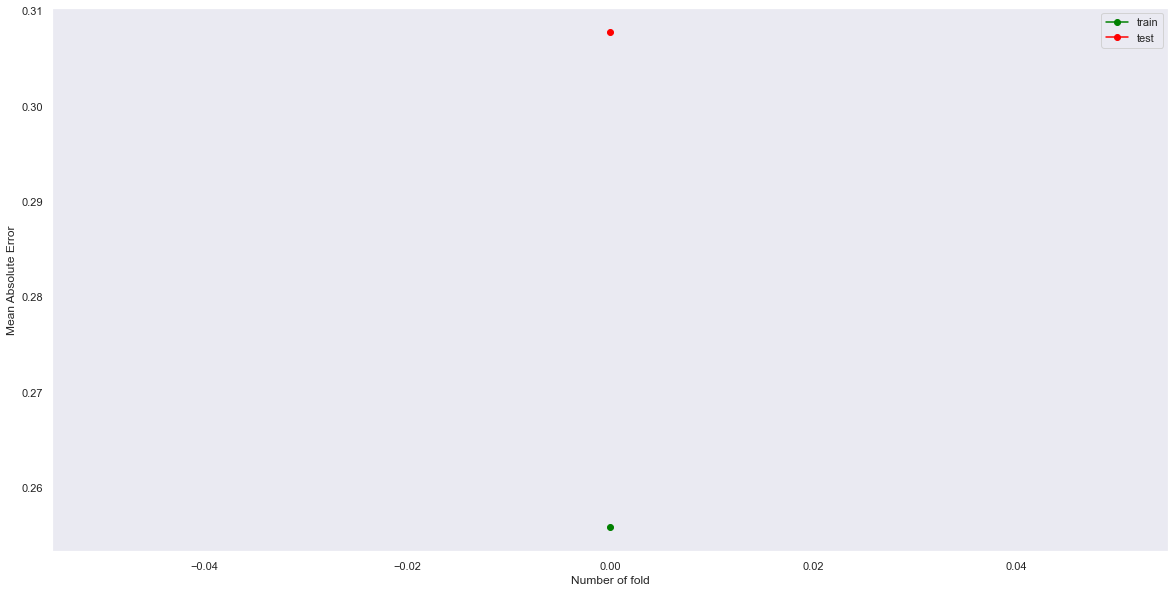

In [71]:
test_model(best_KNN_model, X_test, y_test)

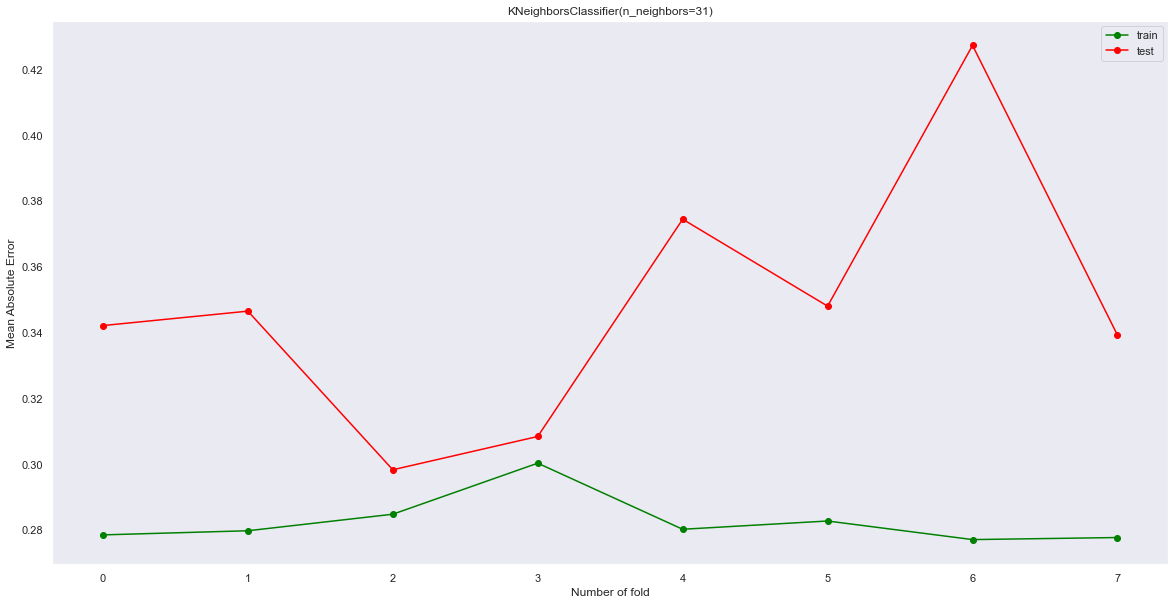

In [72]:
draw_mae(best_KNN_model, X_s, y)


In [73]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'touch_screen',
       'sc_area', 'px_size'],
      dtype='object')

In [74]:
X_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'touch_screen',
       'sc_area', 'px_size'],
      dtype='object')

#### Part 3.2.3 : Random Forest


In [75]:
parameters = { 
    'n_estimators': [60,80,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,4,5,10],
    'criterion' :['gini', 'entropy']
}
Grid_RF =  GridSearchCV(RandomForestClassifier(),parameters,cv=5,verbose=True)
Grid_RF.fit(X_train, y_train)
X_train.columns

Fitting 5 folds for each of 120 candidates, totalling 600 fits


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'touch_screen',
       'sc_area', 'px_size'],
      dtype='object')

In [76]:
print_grid_search_metrics(Grid_RF)

Best score: 0.8225948071536306
Best parameters sets:
criterion:entropy
max_depth:10
max_features:auto
n_estimators:80


In [77]:
best_RF_model = Grid_RF.best_estimator_

In [78]:
best_RF_model.predict(X_test)

array([2, 1, 3, 3, 1, 2, 2, 2, 3, 3, 1, 0, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 3, 1, 1, 3, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 3, 2,
       1, 3, 3, 1, 0, 3, 1, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 1, 2, 0, 3, 1,
       0, 2, 0, 2, 2, 0, 1, 3, 3, 1, 0, 1, 0, 2, 0, 3, 3, 1, 2, 3, 2, 2,
       1, 1, 2, 1, 3, 1, 3, 3, 2, 0, 2, 2, 0, 0, 3, 0, 1, 0, 1, 3, 0, 3,
       3, 0, 2, 1, 1, 0, 0, 3, 0, 3, 2, 1, 3, 1, 2, 2, 1, 0, 3, 2, 2, 0,
       1, 1, 3, 0, 2, 2, 0, 3, 1, 3, 2, 2, 1, 3, 0, 1, 2, 2, 2, 1, 3, 0,
       3, 1, 0, 3, 1, 3, 3, 1, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 0, 2, 1,
       0, 3, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 2, 0, 2, 2, 1, 3, 1, 2, 3,
       0, 0, 3, 1, 2, 2, 3, 0, 0, 1, 3, 2, 0, 3, 3, 0, 3, 0, 3, 0, 3, 1,
       2, 2, 1, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0, 3, 0, 3, 2, 0, 1, 2, 0,
       3, 3, 2, 0, 3, 1, 0, 2, 0, 1, 3, 1, 1, 1, 0, 0, 2, 1, 3, 1, 3, 0,
       1, 1, 3, 0, 1, 3, 3, 2, 3, 3, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 2, 1, 2, 3, 2, 2, 1, 2, 0, 1,

In [79]:
best_RF_model.score(X_test,y_test)

0.7956043956043956

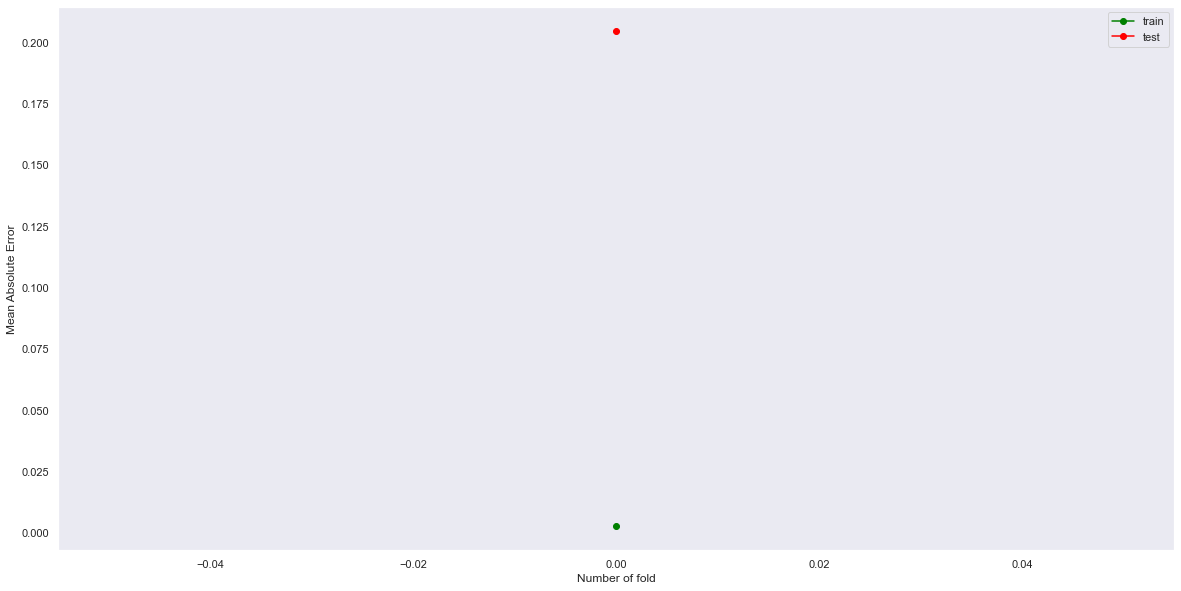

In [80]:
test_model(best_RF_model, X_test, y_test)

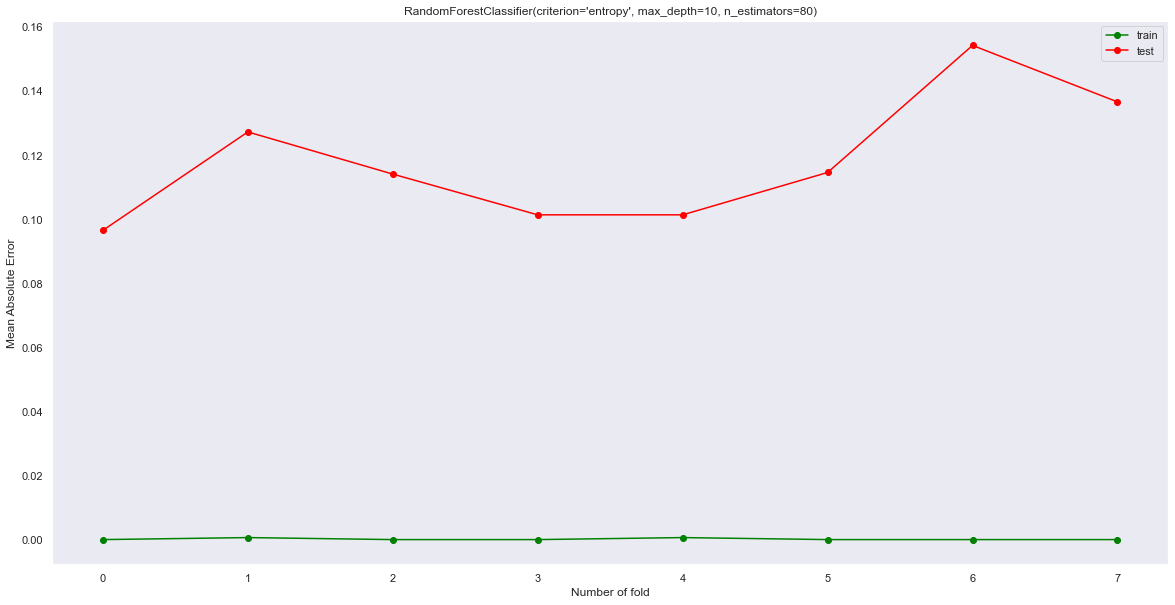

In [81]:
draw_mae(best_RF_model, X_s, y)

In [89]:
X_test_origianl.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

### Part 3.4: Confusion Matrix


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier,cm):
    tn = cm[0][0]
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    accuracy = (tp + tn)/ (tp + fp + fn + tn + 0.0)
    precision = tp/ (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print('Accuracy is: ' + str(accuracy))
    print('Precision is: ' + str(precision))
    print('Recall is: ' + str(recall))
    print()
    
    
def draw_confusion_matrices(confusion_matrices):
    for cm in confusion_matrices:
        classifier,cm = cm[0],cm[1]
        cal_evaluation(classifier,cm)

In [83]:
confusion_matrices = [
    ("Before: Random Forest", confusion_matrix(y_test,model_list[2].predict(X_test_origianl))),
    ("Before: Logistic Regression", confusion_matrix(y_test,model_list[0].predict(X_test_origianl))),
    ("Before: K nearest neighbor", confusion_matrix(y_test,model_list[1].predict(X_test_origianl)))
    #,("Gradient Boosting", confusion_matrix(y_test,best_GB_model.predict(X_test)))
]
draw_confusion_matrices(confusion_matrices)

# Combine defintion of cm scores

Before: Random Forest
Accuracy is: 0.5
Precision is: nan
Recall is: 0.0

Before: Logistic Regression
Accuracy is: 0.5089285714285714
Precision is: 0.5
Recall is: 0.05454545454545454

Before: K nearest neighbor
Accuracy is: 0.5
Precision is: nan
Recall is: 0.0



C:\Users\lzabr\AppData\Local\Temp/ipykernel_1404/1360618915.py:12: RuntimeWarning: invalid value encountered in true_divide
  precision = tp/ (tp + fp + 0.0)


In [84]:
confusion_matrices = [
    ("After: Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("After: Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("After : K nearest neighbor", confusion_matrix(y_test,best_KNN_model.predict(X_test)))
    #,("Gradient Boosting", confusion_matrix(y_test,best_GB_model.predict(X_test)))
]
draw_confusion_matrices(confusion_matrices)

# Combine defintion of cm scores
X_test.columns

ValueError: X has 13 features, but DecisionTreeClassifier is expecting 20 features as input.

Conclusion

Don't need to delete for random forest, just do hyperparameter tunning

For logistic, both score improvement and less overfitting

For KNN, just use the original data

In [99]:
b = 0
a = [1,2,3]
def func(a):
    a.append(4)
    b = a
    return None
func(a)

In [100]:
b

0

In [97]:
func(a)

In [98]:
a

[1, 2, 3, 4, 4]